# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
#https://www.geeksforgeeks.org/get-current-date-using-python/
from datetime import date
today=date.today()
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [4]:
cities[:10]

['yellowknife',
 'tura',
 'cidreira',
 'adamstown',
 'vila velha',
 'vilyuchinsk',
 'usogorsk',
 'longyearbyen',
 'tromso',
 'grytviken']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#using this to look at dictionary keys
city=f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=charlotte'
data=requests.get(city).json()
pprint(data,indent=2)

{ 'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 35.2271, 'lon': -80.8431},
  'dt': 1712010213,
  'id': 4460243,
  'main': { 'feels_like': 79.18,
            'humidity': 55,
            'pressure': 1010,
            'temp': 79.18,
            'temp_max': 80.56,
            'temp_min': 77.56},
  'name': 'Charlotte',
  'sys': { 'country': 'US',
           'id': 3648,
           'sunrise': 1711969754,
           'sunset': 1712015075,
           'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [ { 'description': 'clear sky',
                 'icon': '01d',
                 'id': 800,
                 'main': 'Clear'}],
  'wind': {'deg': 220, 'speed': 13.8}}


In [6]:
# Set the API base URL

url ="http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=metric&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =(query_url + city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | usogorsk
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | tromso
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | imbituba
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | akobo
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | pikeville
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | mustafabad
Processing Record 21 of Set 1 | kailua-kona
Processing Record 22 of Set 1 | pariaman
Processing Record 23 of Set

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-3.66,83,75,5.66,CA,1712010833
1,tura,25.5198,90.2201,20.29,81,4,2.54,IN,1712010853
2,cidreira,-30.1811,-50.2056,23.32,89,4,5.60,BR,1712010853
3,adamstown,-25.0660,-130.1015,23.87,77,94,7.74,PN,1712010854
4,vila velha,-20.3297,-40.2925,26.97,81,75,3.09,BR,1712010447


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,83,75,5.66,CA,1712010833
1,tura,25.5198,90.2201,20.29,81,4,2.54,IN,1712010853
2,cidreira,-30.1811,-50.2056,23.32,89,4,5.60,BR,1712010853
3,adamstown,-25.0660,-130.1015,23.87,77,94,7.74,PN,1712010854
4,vila velha,-20.3297,-40.2925,26.97,81,75,3.09,BR,1712010447


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

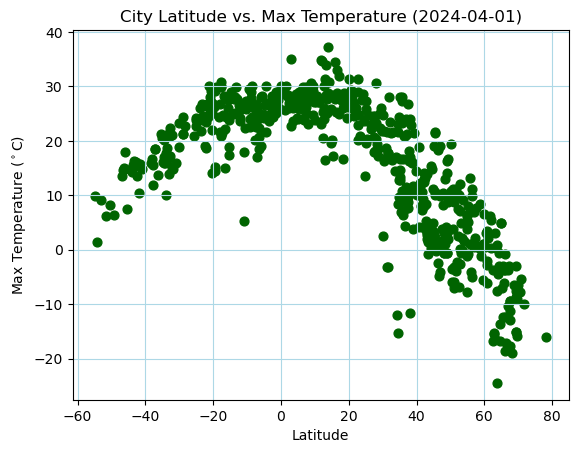

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(['Lat'],['Max Temp'],xlabel='Latitude',ylabel='Max Temperature ($^\circ$C)',title=f'City Latitude vs. Max Temperature ({today})',
                          color='darkgreen',s=40)

# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

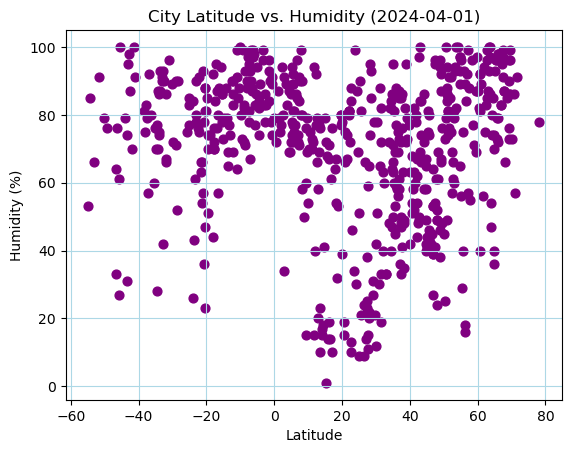

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(['Lat'],['Humidity'],xlabel='Latitude',ylabel='Humidity (%)',title=f'City Latitude vs. Humidity ({today})',color='purple',s=40)

# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

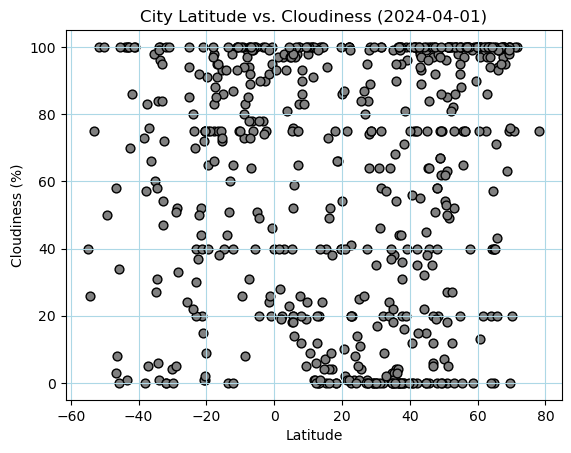

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(['Lat'],['Cloudiness'],xlabel='Latitude',ylabel='Cloudiness (%)',title=f'City Latitude vs. Cloudiness ({today})',color='grey',
                          edgecolors='black',s=40)
# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

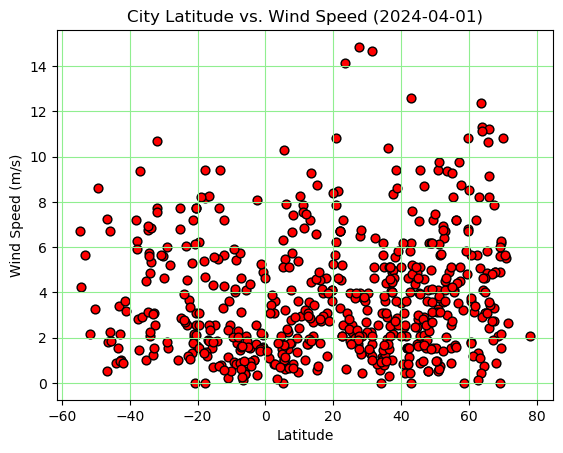

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(['Lat'],['Wind Speed'],xlabel='Latitude',ylabel='Wind Speed (m/s)',title=f'City Latitude vs. Wind Speed ({today})',color='red',
                          edgecolors='black',s=40)

# Incorporate the other graph properties
plt.grid(color='lightgreen')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
#dataframe=choose data frame
#stat= choose between max temp, humidity, cloudiness,etc
#x1=x coordinate for equation on graph
#y1=y coordinate for equation on graph
def get_linregress_lat_vs(dataframe,stat,x1,y1):
    results_list=st.linregress(dataframe['Lat'],dataframe[stat])
    slope=results_list[0]
    intercept=results_list[1]
    r_value=round(results_list[2],2)
    x=[dataframe['Lat'].min(),dataframe['Lat'].max()]
    y_pred=slope*np.array(x)+intercept
    dataframe.plot.scatter(['Lat'],[stat],xlabel='Latitude',ylabel=stat ,title=f'City Latitude vs. {stat} ({today})',color='blue')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x1,y1),fontsize=12,color="red")
    plt.grid()
    plt.plot(x,y_pred,color='red')
    return plt.show()
    

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,83,75,5.66,CA,1712010833
1,tura,25.5198,90.2201,20.29,81,4,2.54,IN,1712010853
5,vilyuchinsk,52.9306,158.4028,0.15,79,52,4.52,RU,1712010854
6,usogorsk,63.4106,48.6872,0.37,93,100,5.06,RU,1712010854
7,longyearbyen,78.2186,15.6401,-16.09,78,75,2.06,SJ,1712010855


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cidreira,-30.1811,-50.2056,23.32,89,4,5.60,BR,1712010853
3,adamstown,-25.0660,-130.1015,23.87,77,94,7.74,PN,1712010854
4,vila velha,-20.3297,-40.2925,26.97,81,75,3.09,BR,1712010447
9,grytviken,-54.2811,-36.5092,1.51,85,26,4.25,GS,1712010855
11,papatowai,-46.5619,169.4708,14.71,64,58,0.52,NZ,1712010856


###  Temperature vs. Latitude Linear Regression Plot

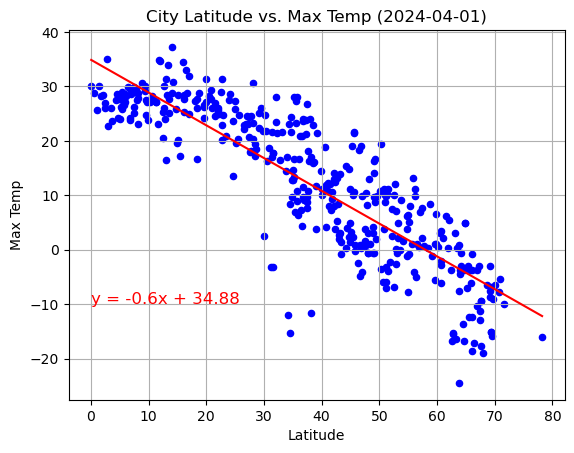

In [18]:
# Linear regression on Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Max Temp',0,-10)


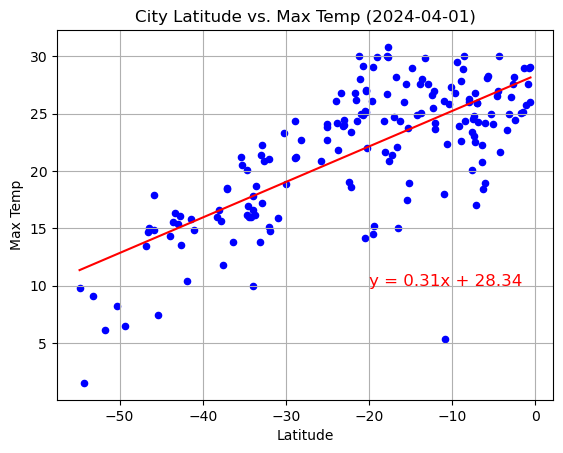

In [19]:
# Linear regression on Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Max Temp',-20,10)

**Discussion about the linear relationship:**
* Looking at the northern hemisphere there is a negative correlation so as latitude increases the max temp decreases. So, if you were to start at the equator  and walk towards the north pole, as you get closer to the North Pole the temperaure would decrease.

* Looking at the southern hemisphere there is a positive correlation so as latitude increases the max temp increases. If you started walking from the equator towards the South Pole as you got closer to the South Pole the temperature would decrease. 

* Taking both of these observations in mind we can say that if you are closer to the equator the max temp will most likely be warmer than if you are closer to either the South or North Pole. 

### Humidity vs. Latitude Linear Regression Plot

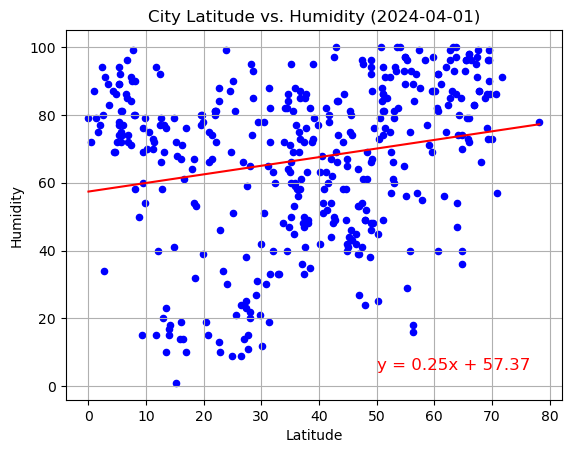

In [31]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Humidity',50,5)

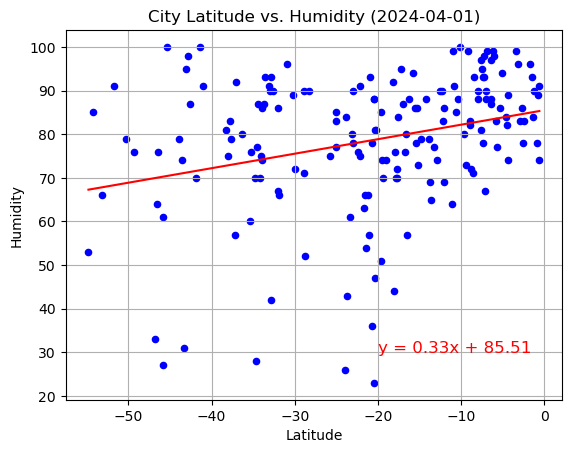

In [30]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Humidity',-20,30)

**Discussion about the linear relationship:** 
* The northern hemisphere has a small postive correltation with humidity and latitude while the southern hemisphere is the opposite. The correlation is very low in both hemispheres and the data is sporatic so its hard to determine if there is a very constant relationship between those categories. Based on this we can say that there are many other factors than just latitude that effect a city's humidity. 


### Cloudiness vs. Latitude Linear Regression Plot

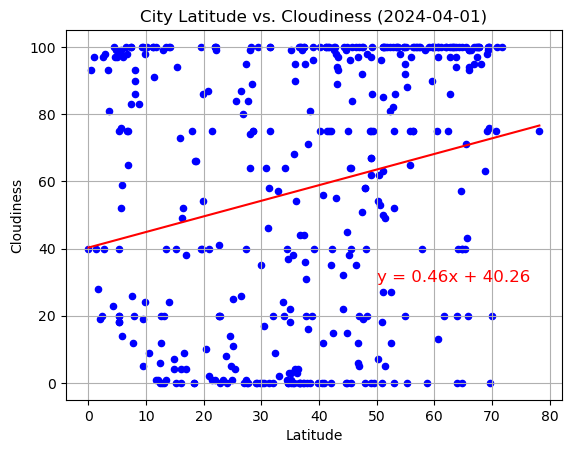

In [28]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Cloudiness',50,30)

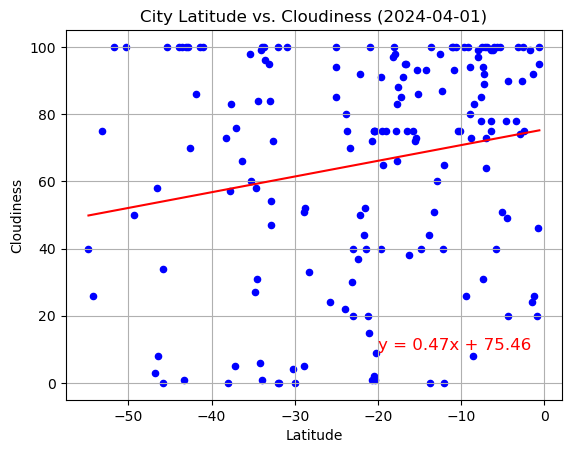

In [23]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Cloudiness',-20,10)

**Discussion about the linear relationship:** 
* In the northern hemisphere, as you go farther from the equator cloudiness increases and in the southern hemisphere as you get further from the equator cloudiness decreases. Just like humidity, the data is very sporatic so its likely that there are many other factors that effect a city's cloudiness because there is very little correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

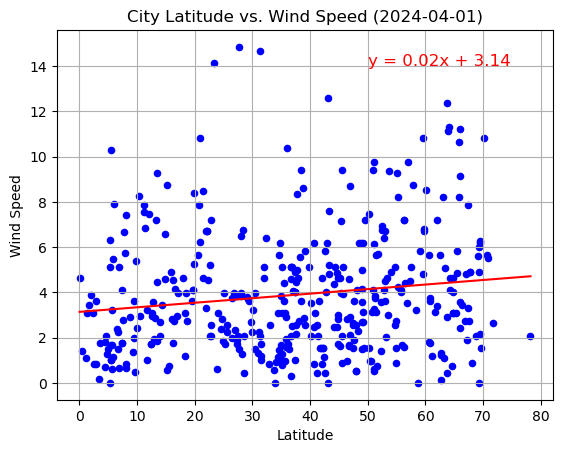

In [26]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Wind Speed',50,14)

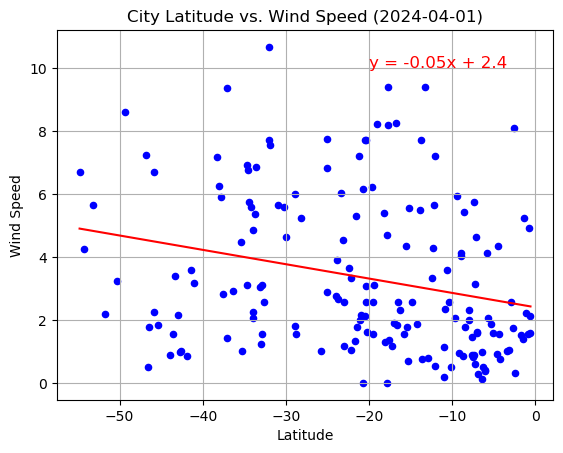

In [27]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Wind Speed',-20,10)

**Discussion about the linear relationship:** 
* In the northern hemisphere as you get farther from the equator the wind speed increases. This is the same in the southern hemisphere, as you get further from the equator the wind speed increases. So, as your distance from the equator increases the wind speed gerneally increases as well.